In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

# Scikit-learn for classical ML, preprocessing, and metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, precision_score, recall_score, confusion_matrix

# Set a random seed for reproducibility
np.random.seed(42)

print("Libraries imported successfully.")

Libraries imported successfully.


In [2]:
# Data Loading and Initial Exploration
# Find the dataset file in the Kaggle input directory
file_path = ''
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        if '.csv' in filename:
            file_path = os.path.join(dirname, filename)
            print(f"Dataset found: {file_path}")
            break
    if file_path:
        break

# Load the dataset
df = pd.read_csv(file_path)

# --- Initial Analysis & Pre-Processing ---

# 1. Map categorical labels to numerical format
# We'll use 1 for 'FAKE' and 0 for 'REAL'
df['LABEL'] = df['LABEL'].map({'FAKE': 1, 'REAL': 0})

# 2. Check for missing values
print(f"\nContains NaN values: {df.isna().any().any()}")
print(f"Contains null values: {df.isnull().any().any()}")

# 3. Shuffle the dataset to ensure randomness
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

# 4. Separate features (X) and target (y)
X = df.drop(columns=['LABEL']).values
y = df['LABEL'].values

# 5. Display dataset info
print("\nDataset shape:", df.shape)
print("Features shape:", X.shape)
print("Target shape:", y.shape)
print("\nFirst 5 rows of the processed DataFrame:")
df.head()

Dataset found: /kaggle/input/deep-voice-deepfake-voice-recognition/KAGGLE/DATASET-balanced.csv

Contains NaN values: False
Contains null values: False

Dataset shape: (11778, 27)
Features shape: (11778, 26)
Target shape: (11778,)

First 5 rows of the processed DataFrame:


,chroma_stft,rms,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,LABEL
0,0.441114,0.079663,922.780253,1385.841230,1606.028439,0.023917,-320.896545,211.678055,10.367925,-17.441900,...,-2.236197,1.552115,2.843510,4.692409,3.106334,-4.299569,-5.380206,4.532225,5.579152,0
1,0.432119,0.039595,2413.310510,2980.346767,4658.142160,0.048391,-357.386597,141.067474,-8.478411,50.100609,...,-5.744374,3.693567,4.884624,-0.293556,9.605581,-0.679518,6.833396,0.411718,-0.786885,1
2,0.370716,0.013605,3116.226937,3141.811112,5179.419933,0.090177,-445.311676,135.565094,-18.134920,19.937037,...,-9.979925,-8.667892,-5.452301,-3.327649,-8.551641,-9.594158,-5.171256,-11.394002,-16.235928,1
3,0.354024,0.029757,2119.633001,2534.221251,3645.279255,0.049672,-358.246521,182.810425,-51.112995,22.122393,...,-20.808508,-1.759383,1.881368,-7.776491,-7.425082,-11.308017,0.909932,-7.334956,-3.903934,0
4,0.441625,0.057751,2862.566856,3206.461251,4667.844347,0.081123,-328.314270,110.892700,-23.511282,21.168459,...,-5.999317,-4.273880,-7.507450,-3.208905,-4.326396,-1.923048,-3.697001,-1.108554,-5.886751,1


--- Starting Exploratory Data Analysis ---

[1] DATASET OVERVIEW & DATA TYPES
-------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11778 entries, 0 to 11777
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   chroma_stft         11778 non-null  float64
 1   rms                 11778 non-null  float64
 2   spectral_centroid   11778 non-null  float64
 3   spectral_bandwidth  11778 non-null  float64
 4   rolloff             11778 non-null  float64
 5   zero_crossing_rate  11778 non-null  float64
 6   mfcc1               11778 non-null  float64
 7   mfcc2               11778 non-null  float64
 8   mfcc3               11778 non-null  float64
 9   mfcc4               11778 non-null  float64
 10  mfcc5               11778 non-null  float64
 11  mfcc6               11778 non-null  float64
 12  mfcc7               11778 non-null  float64
 13  mfcc8               11778 non-null 

,count,mean,std,min,25%,50%,75%,max
chroma_stft,11778.0,0.421925,0.069392,0.200353,0.372330,0.417708,0.467741,0.707202
rms,11778.0,0.037894,0.028071,0.000043,0.015098,0.031870,0.054046,0.168958
spectral_centroid,11778.0,2719.201373,1066.754739,756.163229,2062.875836,2579.963841,3283.857559,17685.006690
spectral_bandwidth,11778.0,3050.299988,872.258653,1096.903152,2569.289971,3055.863462,3581.271953,7836.844404
rolloff,11778.0,4977.617722,2170.158448,1063.964279,3448.144178,4683.958018,6211.301553,21130.544670
zero_crossing_rate,11778.0,0.070821,0.039292,0.015504,0.045749,0.060237,0.085149,0.812480
mfcc1,11778.0,-382.562312,79.593413,-1055.002197,-432.928848,-365.756241,-321.772781,-193.430145
mfcc2,11778.0,145.056311,36.188506,-83.816765,120.522711,145.970162,168.321331,284.727997
mfcc3,11778.0,-24.699932,27.728976,-132.491104,-35.550402,-19.164229,-6.235028,67.475792
mfcc4,11778.0,21.311292,22.480432,-47.770000,3.635681,22.218458,37.017731,86.585747


Observation: Features are on vastly different scales (e.g., compare 'entropy' and 'mean'). This confirms that feature scaling (like StandardScaler) is essential.

[3] TARGET VARIABLE (LABEL) DISTRIBUTION
------------------------------------------


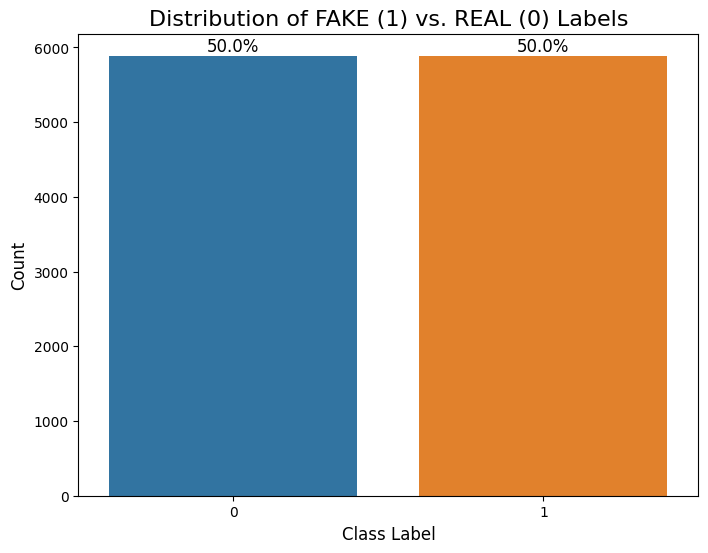

Value Counts:
LABEL
0    5889
1    5889
Name: count, dtype: int64
Observation: The dataset is perfectly balanced. This is ideal, as we don't need to worry about techniques like over/under-sampling or using class weights.

[4] DISTRIBUTION OF INDIVIDUAL FEATURES
---------------------------------------


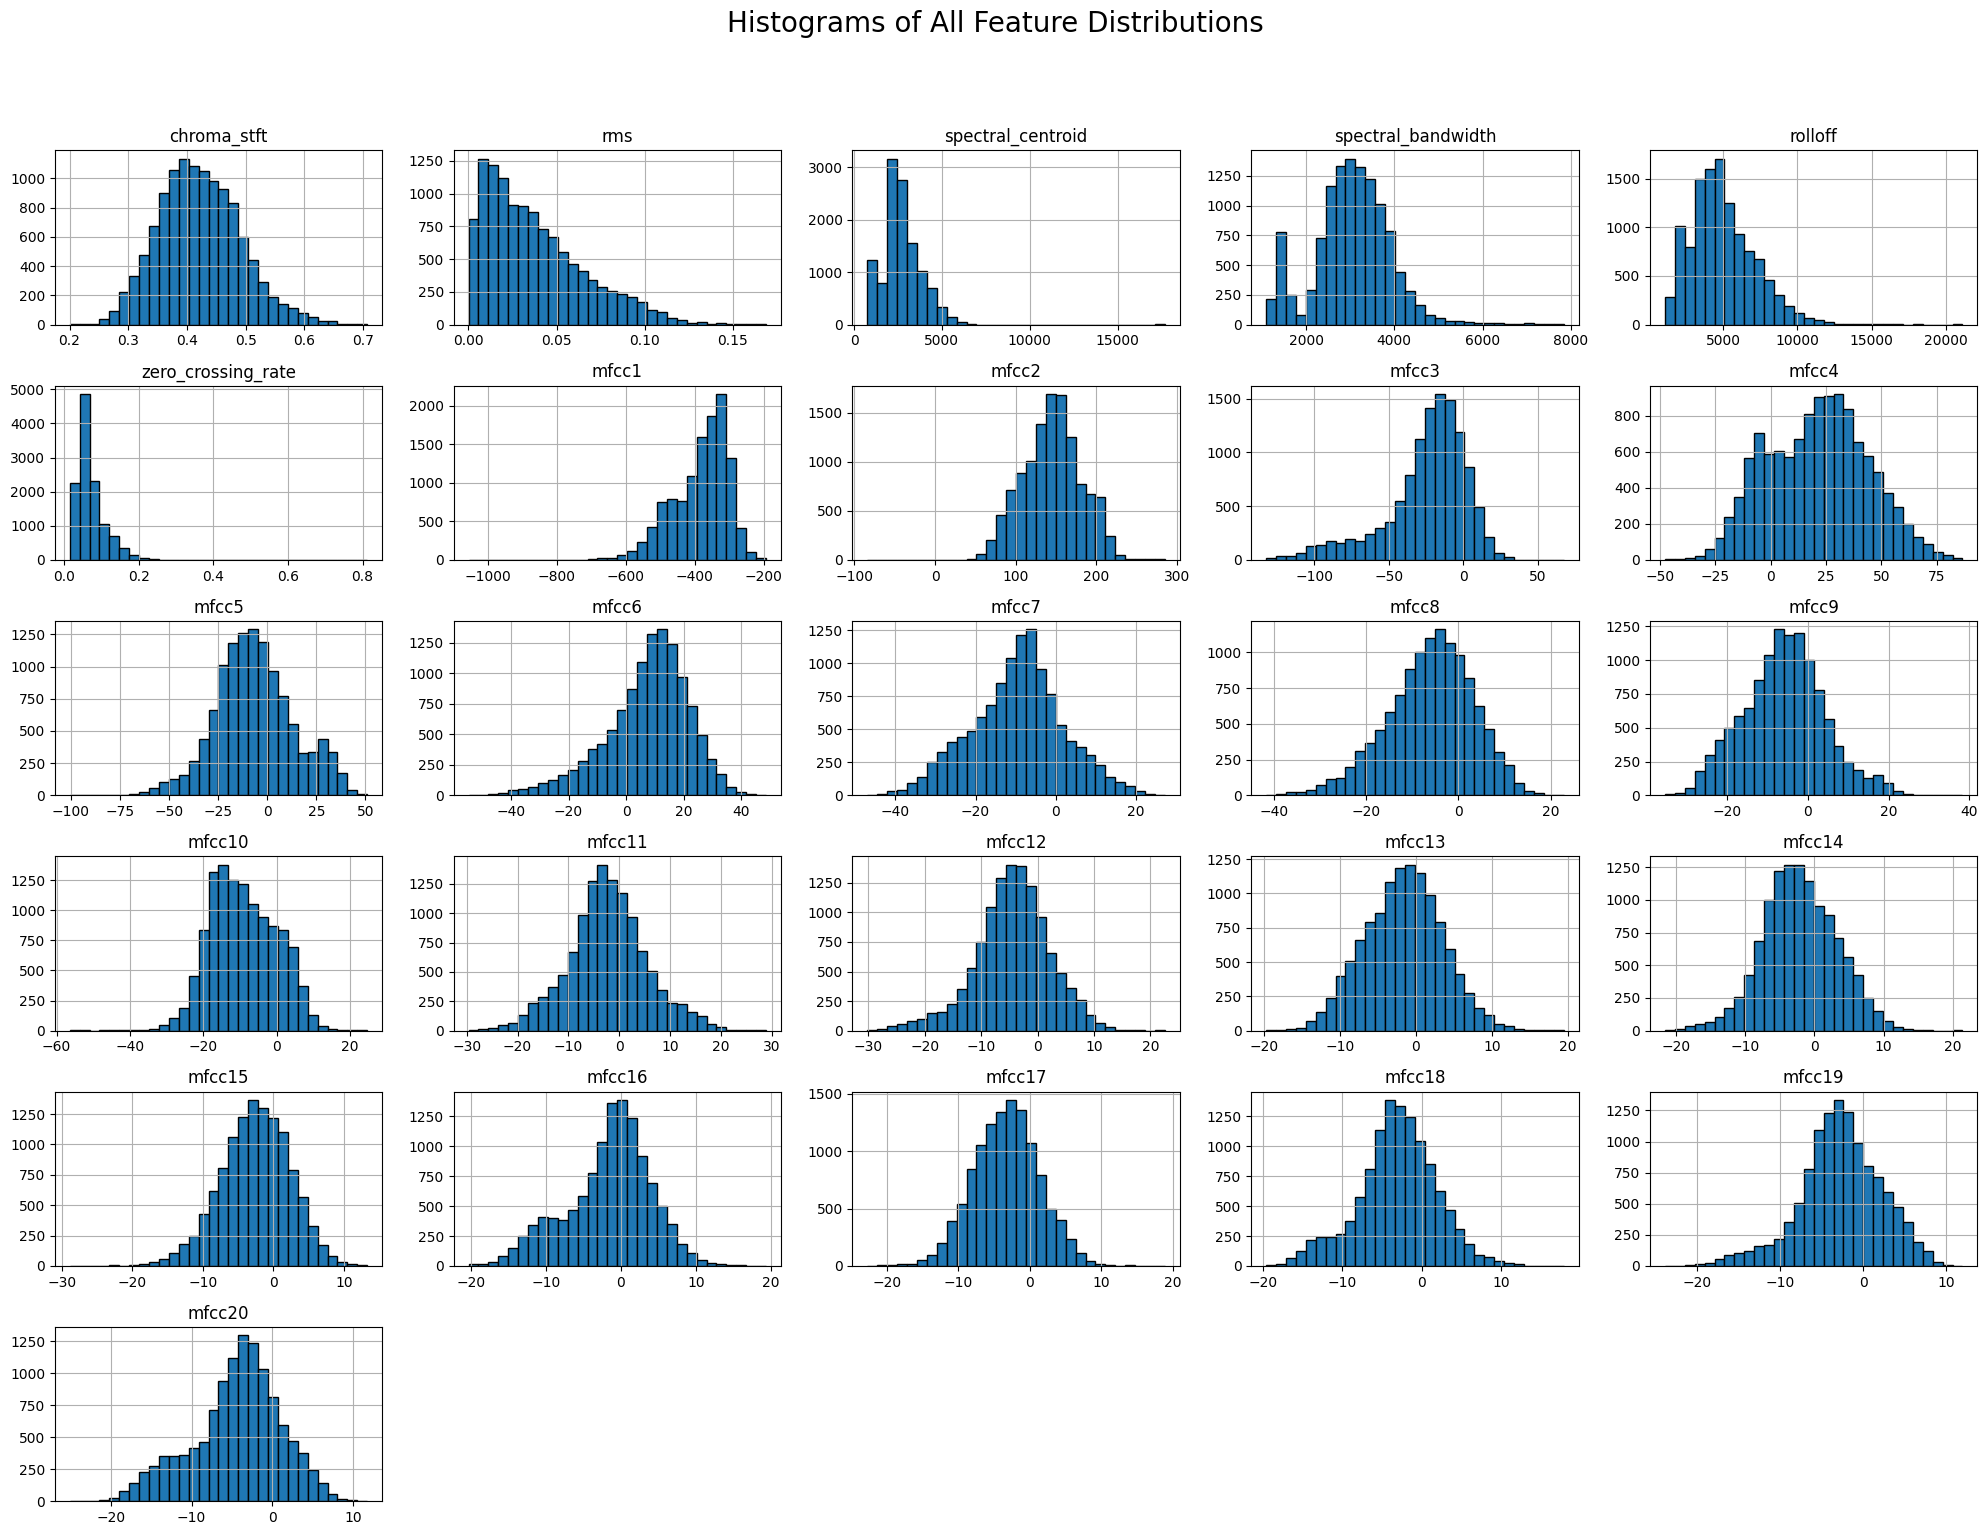

Observation: Many features exhibit different types of distributions. Some are somewhat Gaussian (e.g., 'skewness'), while others are highly skewed (e.g., 'kurtosis', 'entropy'). This diversity is common in real-world data.

[5] FEATURE CORRELATION HEATMAP
---------------------------------


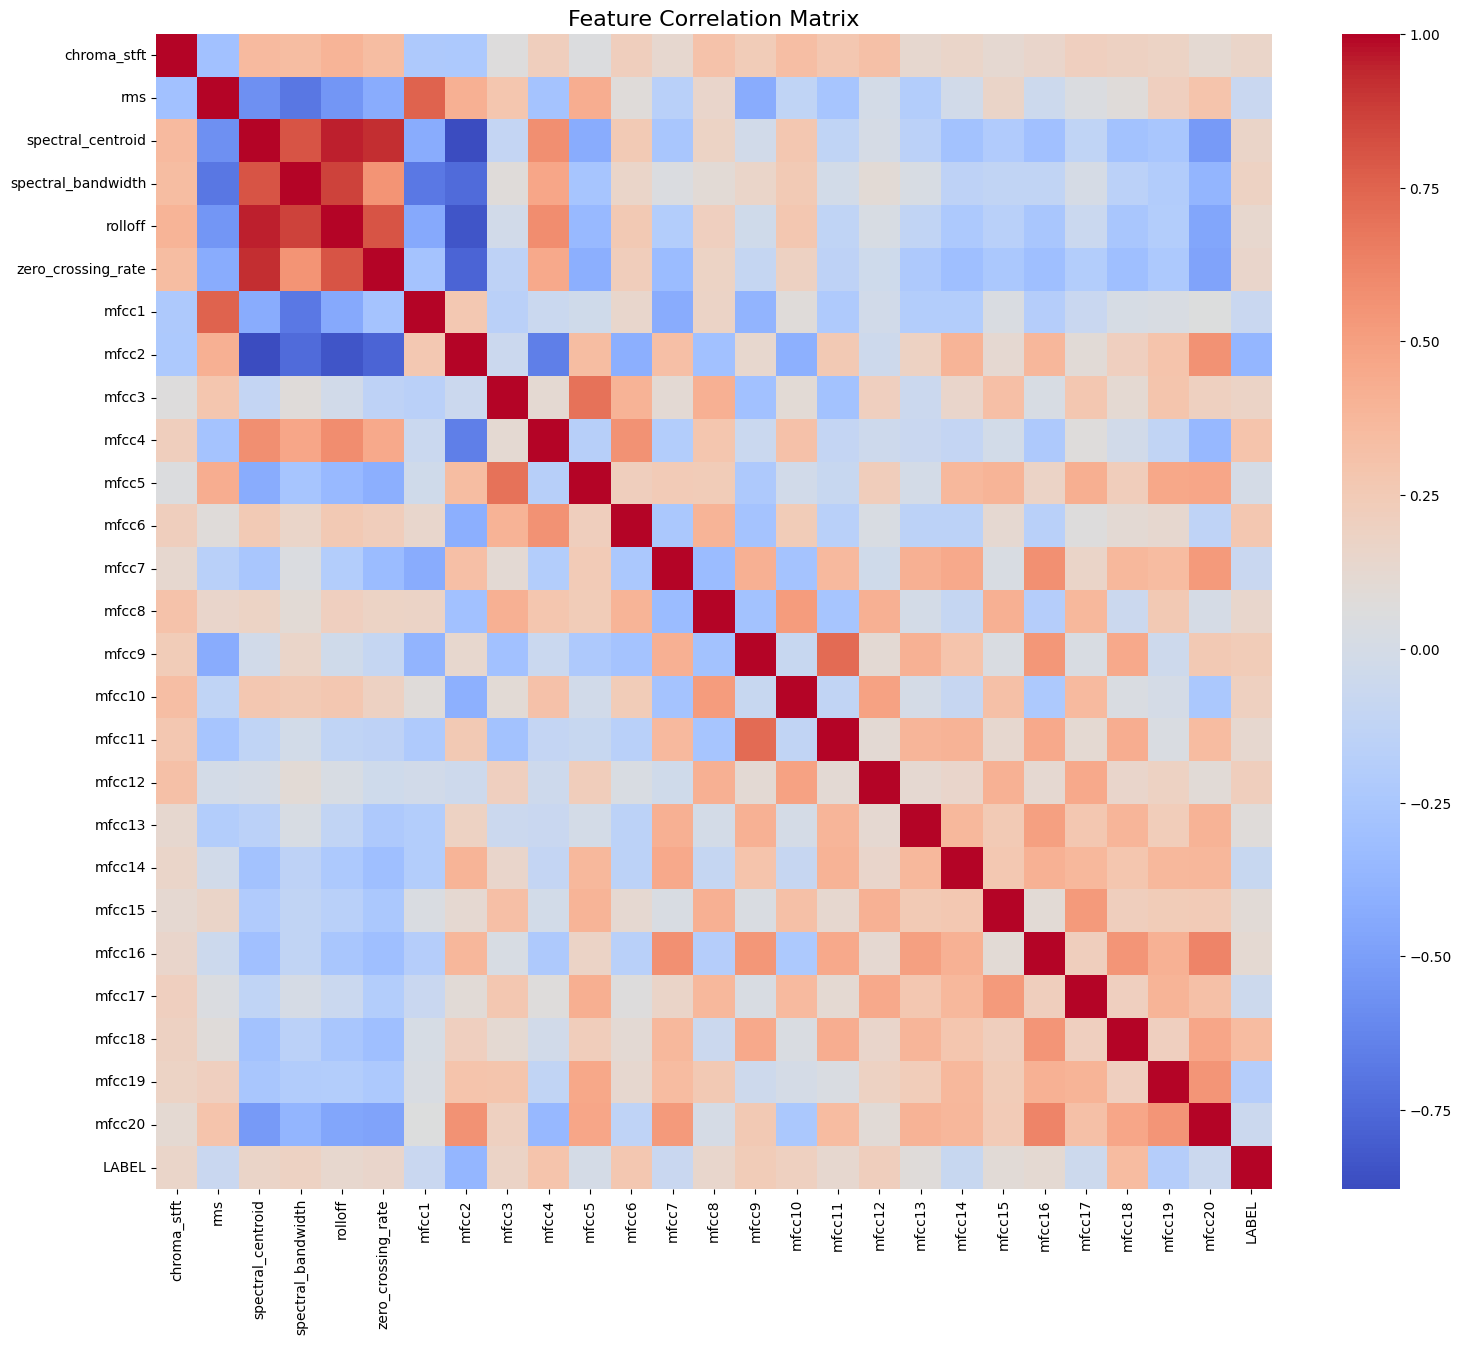

Observation: We can see several blocks of highly correlated features (deep red or deep blue). For example, many of the 'mean' and 'std' related features are correlated. High correlation (multicollinearity) doesn't harm tree-based models or KNN as much, but it can affect the coefficient interpretation of linear models like Logistic Regression. PCA is an excellent way to handle this by creating uncorrelated components.

[6] FEATURE DISTRIBUTIONS PER CLASS (REAL vs. FAKE)
--------------------------------------------------


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

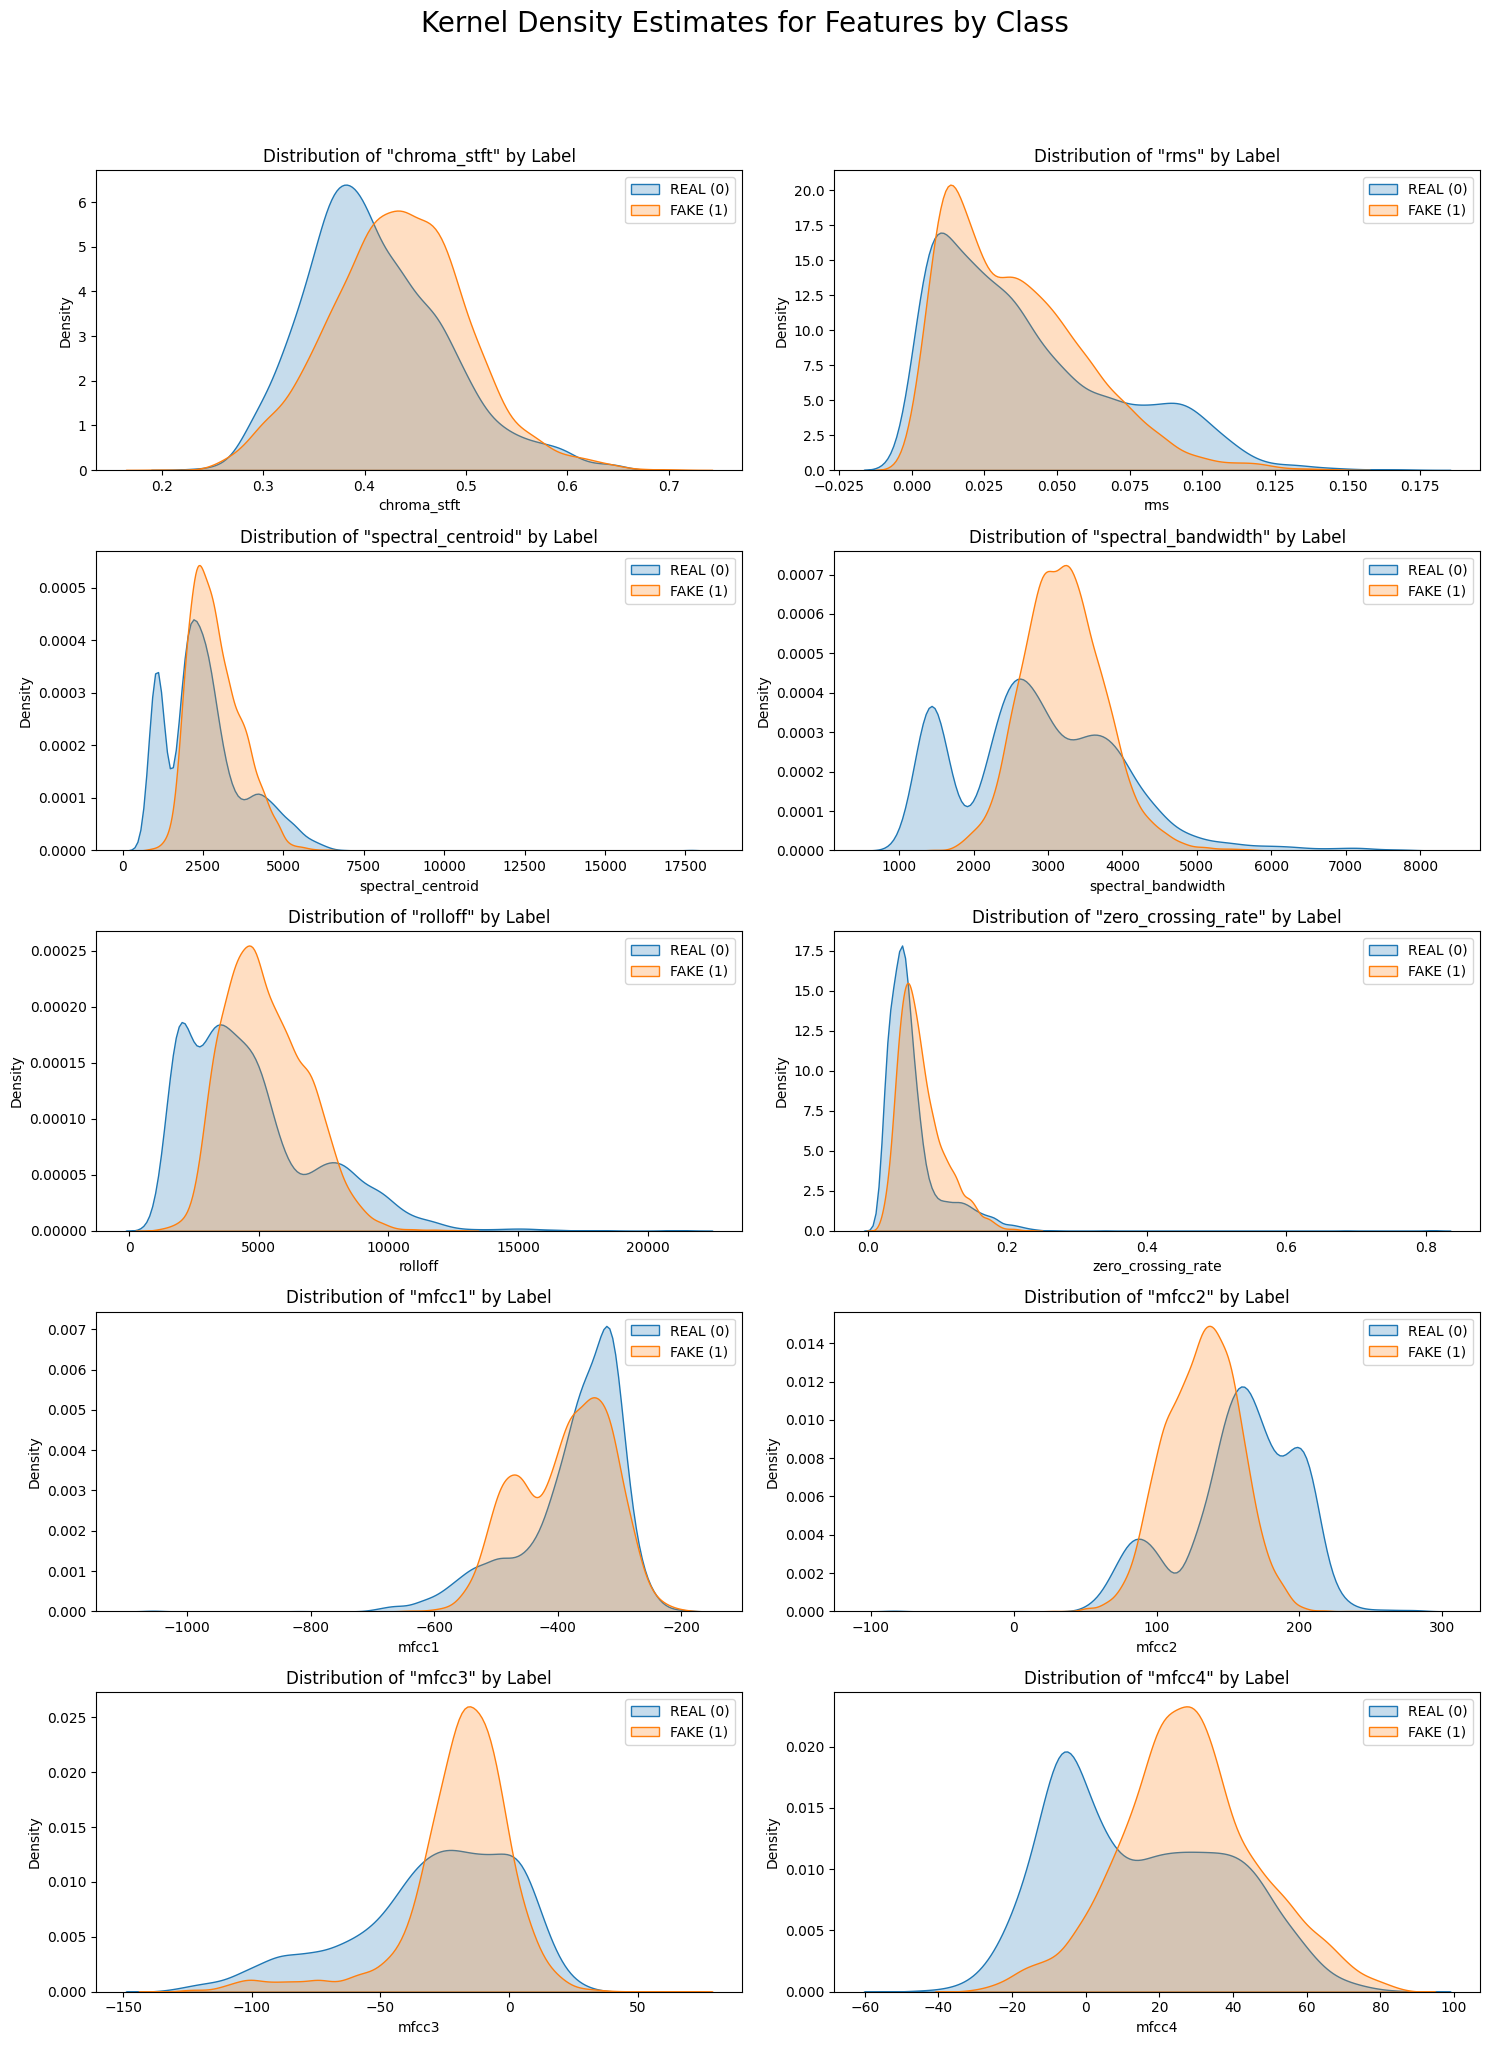

Observation: For most features shown, the distributions for REAL and FAKE classes are noticeably different. This is a very positive sign! It means these features contain predictive information that a machine learning model can use to distinguish between the two classes. For example, the peak of the 'mean' distribution for FAKE samples seems to be at a different location than for REAL samples.

--- End of Exploratory Data Analysis ---


In [4]:
print("--- Starting Exploratory Data Analysis ---")

# --- 1. Basic Dataset Information ---
print("\n[1] DATASET OVERVIEW & DATA TYPES")
print("-------------------------------------")
df.info()

# --- 2. Statistical Summary ---
# .describe().T transposes the output for better readability with many columns.
print("\n[2] STATISTICAL SUMMARY OF FEATURES")
print("-------------------------------------")
display(df.describe().T)
print("Observation: Features are on vastly different scales (e.g., compare 'entropy' and 'mean'). This confirms that feature scaling (like StandardScaler) is essential.")

# --- 3. Target Variable Distribution ---
print("\n[3] TARGET VARIABLE (LABEL) DISTRIBUTION")
print("------------------------------------------")
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='LABEL', data=df)
plt.title('Distribution of FAKE (1) vs. REAL (0) Labels', fontsize=16)
plt.xlabel('Class Label', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Add percentages on top of the bars
total = len(df['LABEL'])
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='bottom', fontsize=12)

plt.show()
print(f"Value Counts:\n{df['LABEL'].value_counts()}")
print("Observation: The dataset is perfectly balanced. This is ideal, as we don't need to worry about techniques like over/under-sampling or using class weights.")

# --- 4. Univariate Analysis: Feature Distributions ---
print("\n[4] DISTRIBUTION OF INDIVIDUAL FEATURES")
print("---------------------------------------")
features = df.drop('LABEL', axis=1)
features.hist(bins=30, figsize=(20, 15), layout=(-1, 5), edgecolor='black')
plt.suptitle('Histograms of All Feature Distributions', fontsize=20, y=1.02)
plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.show()
print("Observation: Many features exhibit different types of distributions. Some are somewhat Gaussian (e.g., 'skewness'), while others are highly skewed (e.g., 'kurtosis', 'entropy'). This diversity is common in real-world data.")

# --- 5. Correlation Analysis ---
print("\n[5] FEATURE CORRELATION HEATMAP")
print("---------------------------------")
corr_matrix = df.corr()

plt.figure(figsize=(18, 15))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False)
plt.title('Feature Correlation Matrix', fontsize=16)
plt.show()

print("Observation: We can see several blocks of highly correlated features (deep red or deep blue). For example, many of the 'mean' and 'std' related features are correlated. High correlation (multicollinearity) doesn't harm tree-based models or KNN as much, but it can affect the coefficient interpretation of linear models like Logistic Regression. PCA is an excellent way to handle this by creating uncorrelated components.")

# --- 6. Bivariate Analysis: Feature Distributions by Target Class ---
print("\n[6] FEATURE DISTRIBUTIONS PER CLASS (REAL vs. FAKE)")
print("--------------------------------------------------")
# Let's visualize the first 10 features to see how their distributions differ for REAL and FAKE labels.
feature_names = df.drop('LABEL', axis=1).columns
features_to_plot = feature_names[:10]
n_cols = 2
n_rows = (len(features_to_plot) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 4))
axes = axes.flatten()

for i, feature in enumerate(features_to_plot):
    sns.kdeplot(df[df['LABEL'] == 0][feature], ax=axes[i], label='REAL (0)', fill=True)
    sns.kdeplot(df[df['LABEL'] == 1][feature], ax=axes[i], label='FAKE (1)', fill=True)
    axes[i].set_title(f'Distribution of "{feature}" by Label', fontsize=12)
    axes[i].legend()

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)
    
plt.suptitle('Kernel Density Estimates for Features by Class', fontsize=20, y=1.02)
plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.show()
print("Observation: For most features shown, the distributions for REAL and FAKE classes are noticeably different. This is a very positive sign! It means these features contain predictive information that a machine learning model can use to distinguish between the two classes. For example, the peak of the 'mean' distribution for FAKE samples seems to be at a different location than for REAL samples.")

print("\n--- End of Exploratory Data Analysis ---")

--- Generating Static Spectral Profile Plots ---


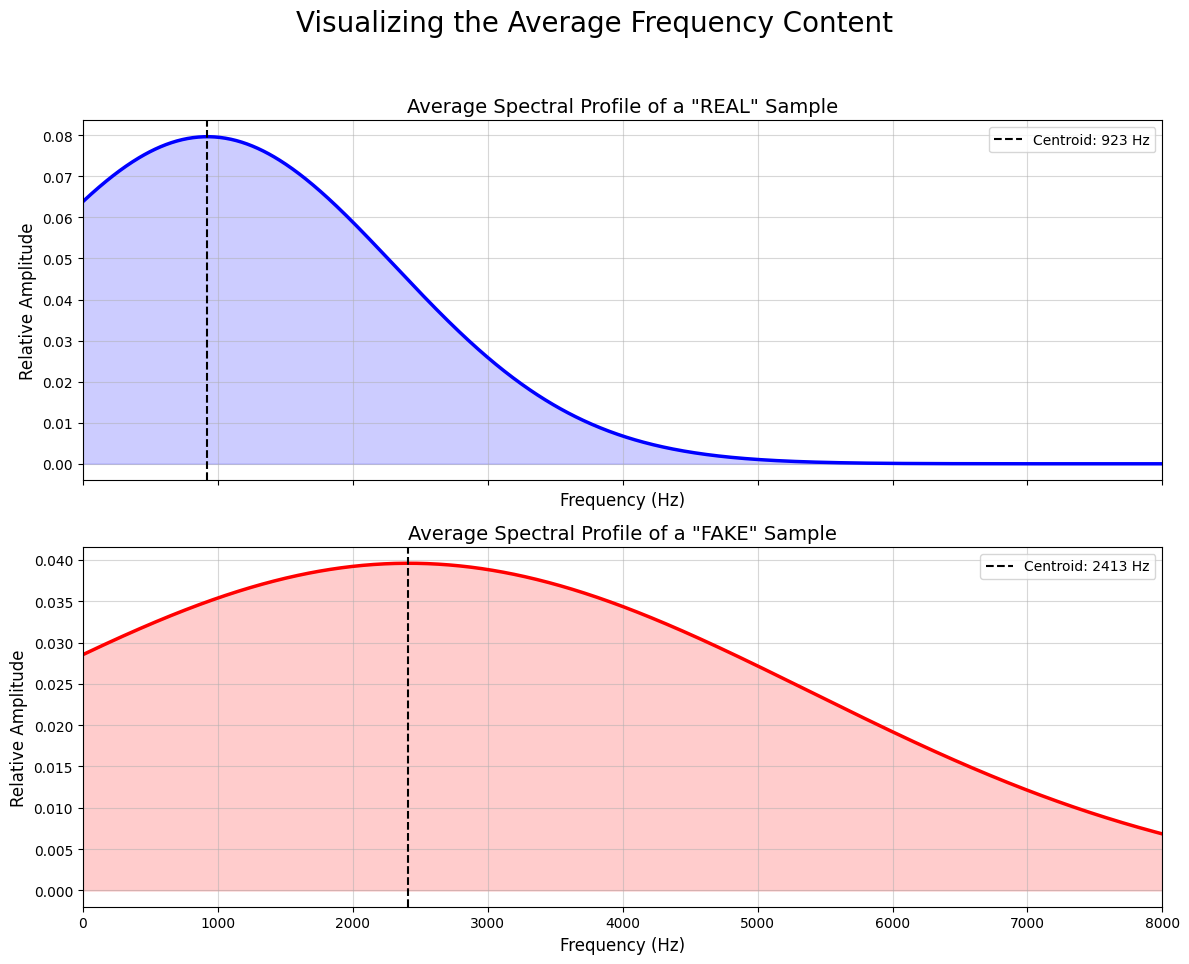


--- Interpretation of the Spectral Profile Plots ---

Since we don't have the raw audio to create a full spectrogram, this plot shows the next best thing: the **average spectral shape**. 
Think of this as an average vertical slice of the spectrogram you wanted to see.

1.  **Peak Location (Centroid):** The dotted line shows the 'center of mass' of the sound's frequency. A peak shifted to the right means a brighter, higher-pitched sound on average.
2.  **Width of the Curve (Bandwidth):** A wider curve means the sound's energy is spread across more frequencies, suggesting a richer or noisier sound. A narrow curve indicates a more pure, tonal sound.
3.  **Height of the Curve (Amplitude):** A taller curve corresponds to a louder overall signal on average.

**Observation:** By comparing the REAL vs. FAKE plots, you can visually see the average acoustic differences that the machine learning model will use for classification. For example, one class might consistently have a higher centroid (

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

print("--- Generating Static Spectral Profile Plots ---")

# --- 1. Function to Plot the Spectral Profile ---
def plot_spectral_profile(sample, sample_type, ax):
    """
    Plots a representative spectral shape using spectral features.
    
    Args:
        sample (pd.Series): A row from the DataFrame.
        sample_type (str): 'REAL' or 'FAKE'.
        ax (matplotlib.axes.Axes): The axes to plot on.
    """
    # --- Find the correct feature names robustly ---
    try:
        centroid_col = [col for col in sample.index if 'centroid' in col][0]
        bandwidth_col = [col for col in sample.index if 'bandwidth' in col][0]
        rms_col = [col for col in sample.index if 'rms' in col][0]
    except IndexError:
        print("Error: Could not find required spectral feature columns (centroid, bandwidth, rms).")
        return

    # --- Extract key features ---
    # The center of our spectral energy
    center_frequency = sample[centroid_col]
    # The spread of our spectral energy (standard deviation)
    spread = sample[bandwidth_col]
    # The overall amplitude/power of the signal
    amplitude = sample[rms_col]
    
    # We need a plausible standard deviation for the plot
    if spread <= 0: spread = 1e-3 # Avoid division by zero

    # --- Create the frequency axis ---
    freq_range = np.linspace(0, 8000, 1000) # Plot up to 8kHz

    # --- Generate the spectral shape using a Normal (Gaussian) distribution ---
    # The PDF of the normal distribution is a perfect model for this
    spectral_shape = norm.pdf(freq_range, loc=center_frequency, scale=spread)
    
    # Scale the shape by the amplitude (RMS)
    scaled_spectral_shape = spectral_shape * amplitude / np.max(spectral_shape)

    # --- Plotting ---
    color = 'blue' if sample_type == 'REAL' else 'red'
    ax.plot(freq_range, scaled_spectral_shape, color=color, linewidth=2.5)
    ax.fill_between(freq_range, scaled_spectral_shape, color=color, alpha=0.2)
    
    # Add a vertical line for the centroid
    ax.axvline(x=center_frequency, color='k', linestyle='--', label=f'Centroid: {center_frequency:.0f} Hz')
    
    ax.set_title(f'Average Spectral Profile of a "{sample_type}" Sample', fontsize=14)
    ax.set_xlabel('Frequency (Hz)', fontsize=12)
    ax.set_ylabel('Relative Amplitude', fontsize=12)
    ax.grid(True, alpha=0.5)
    ax.set_xlim(0, 8000)
    ax.legend()


# --- 2. Select One REAL and One FAKE Sample ---
real_audio_sample = df[df['LABEL'] == 0].iloc[0]
fake_audio_sample = df[df['LABEL'] == 1].iloc[0]

# --- 3. Create the plots ---
fig, axes = plt.subplots(2, 1, figsize=(12, 10), sharex=True)
plot_spectral_profile(real_audio_sample, 'REAL', axes[0])
plot_spectral_profile(fake_audio_sample, 'FAKE', axes[1])

fig.suptitle('Visualizing the Average Frequency Content', fontsize=20, y=0.96)
plt.tight_layout(rect=[0, 0, 1, 0.93])
plt.show()

# --- 4. Interpretation ---
print("\n--- Interpretation of the Spectral Profile Plots ---")
print("""
Since we don't have the raw audio to create a full spectrogram, this plot shows the next best thing: the **average spectral shape**. 
Think of this as an average vertical slice of the spectrogram you wanted to see.

1.  **Peak Location (Centroid):** The dotted line shows the 'center of mass' of the sound's frequency. A peak shifted to the right means a brighter, higher-pitched sound on average.
2.  **Width of the Curve (Bandwidth):** A wider curve means the sound's energy is spread across more frequencies, suggesting a richer or noisier sound. A narrow curve indicates a more pure, tonal sound.
3.  **Height of the Curve (Amplitude):** A taller curve corresponds to a louder overall signal on average.

**Observation:** By comparing the REAL vs. FAKE plots, you can visually see the average acoustic differences that the machine learning model will use for classification. For example, one class might consistently have a higher centroid (brighter sound) or a wider bandwidth (noisier sound).
""")

In [7]:
# --- Data Preparation ---
# Define features (X) and target (y) from the main DataFrame
print("Defining features (X) and target (y)...")
X = df.drop('LABEL', axis=1)  # X is all columns EXCEPT 'LABEL'
y = df['LABEL']              # y is ONLY the 'LABEL' column

# Verify the shapes to ensure they are correct
# X should be 2D (samples, features) and y should be 1D (samples,)
print(f"Shape of X: {X.shape}")
print(f"Shape of y: {y.shape}\n")


# --- Data Splitting and Scaling ---
print("Splitting and scaling data...")
# Split data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Initialize a scaler
scaler = StandardScaler()

# Fit the scaler ONLY on the training data
scaler.fit(X_train)

# Apply the scaler to both training and test data
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"Training data shape: {X_train_scaled.shape}")
print(f"Testing data shape: {X_test_scaled.shape}")

Defining features (X) and target (y)...
Shape of X: (11778, 26)
Shape of y: (11778,)

Splitting and scaling data...
Training data shape: (9422, 26)
Testing data shape: (2356, 26)


In [8]:
# Analysis: Dimensionality Reduction
"""
PCA (Principal Component Analysis):
    - Unsupervised method.
    - Identifies directions (principal components) that capture the maximum variance in the data.

SVD (Singular Value Decomposition):
    - Unsupervised method, often applied using TruncatedSVD.
    - Works well for sparse data and produces results similar to PCA.

LDA (Linear Discriminant Analysis):
    - Supervised method.
    - Finds a feature subspace that maximizes class separability.
"""

N_COMPONENTS = 10  # Number of dimensions to reduce to

# --- 1. Principal Component Analysis (PCA) ---
pca = PCA(n_components=N_COMPONENTS)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)
print(f"Data shape after PCA: {X_train_pca.shape}")

# --- 2. Singular Value Decomposition (SVD) ---
svd = TruncatedSVD(n_components=N_COMPONENTS, random_state=42)
X_train_svd = svd.fit_transform(X_train_scaled)
X_test_svd = svd.transform(X_test_scaled)
print(f"Data shape after SVD: {X_train_svd.shape}")

# --- 3. Linear Discriminant Analysis (LDA) ---
# LDA is supervised, so it uses y_train for fitting.
# The number of components in LDA is at most min(n_classes - 1, n_features).
# Here, n_classes is 2, so we can only reduce to 1 component.
lda = LDA(n_components=1)
X_train_lda = lda.fit_transform(X_train_scaled, y_train)
X_test_lda = lda.transform(X_test_scaled)
print(f"Data shape after LDA: {X_train_lda.shape}")

# Store all datasets in a dictionary for easy access
datasets = {
    "Original Scaled": (X_train_scaled, X_test_scaled),
    "PCA": (X_train_pca, X_test_pca),
    "SVD": (X_train_svd, X_test_svd),
    "LDA": (X_train_lda, X_test_lda)
}




Data shape after PCA: (9422, 10)
Data shape after SVD: (9422, 10)
Data shape after LDA: (9422, 1)


In [9]:
# Analysis: Classical Machine Learning Models

"""
We will train and evaluate two classical models:
    1. Logistic Regression
    2. K-Nearest Neighbors (KNN)

These models will be tested on each of our preprocessed datasets:
    - Original
    - PCA
    - SVD
    - LDA
"""

# --- Model Training and Evaluation ---

# Helper function to evaluate models and return metrics
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1] # For AUC
    
    metrics = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1-Score': f1_score(y_test, y_pred),
        'AUC': roc_auc_score(y_test, y_proba)
    }
    return metrics

# Define the models to be tested
models = {
    "Logistic Regression": LogisticRegression(random_state=42, max_iter=1000),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=10)
}

results = []

# Loop through each dimensionality reduction technique
for dr_name, (X_train_dr, X_test_dr) in datasets.items():
    # Loop through each model
    for model_name, model in models.items():
        print(f"Training {model_name} on {dr_name} data...")
        
        # Train the model
        model.fit(X_train_dr, y_train)
        
        # Evaluate the model
        metrics = evaluate_model(model, X_test_dr, y_test)
        
        # Store results
        result_entry = {'Model': model_name, 'Dimensionality Reduction': dr_name, **metrics}
        results.append(result_entry)

# Create a DataFrame to display results
results_df = pd.DataFrame(results)
print("\n--- Classical Model Performance ---")
results_df



Training Logistic Regression on Original Scaled data...
Training K-Nearest Neighbors on Original Scaled data...
Training Logistic Regression on PCA data...
Training K-Nearest Neighbors on PCA data...
Training Logistic Regression on SVD data...
Training K-Nearest Neighbors on SVD data...
Training Logistic Regression on LDA data...
Training K-Nearest Neighbors on LDA data...

--- Classical Model Performance ---


,Model,Dimensionality Reduction,Accuracy,Precision,Recall,F1-Score,AUC
0,Logistic Regression,Original Scaled,0.908319,0.915371,0.899830,0.907534,0.967831
1,K-Nearest Neighbors,Original Scaled,0.993209,0.996581,0.989813,0.993186,0.999443
2,Logistic Regression,PCA,0.817912,0.812865,0.825976,0.819368,0.891470
3,K-Nearest Neighbors,PCA,0.984295,0.991387,0.977080,0.984181,0.999108
4,Logistic Regression,SVD,0.817912,0.812865,0.825976,0.819368,0.891480
5,K-Nearest Neighbors,SVD,0.984720,0.991394,0.977929,0.984615,0.999115
6,Logistic Regression,LDA,0.893888,0.898625,0.887946,0.893254,0.960909
7,K-Nearest Neighbors,LDA,0.890917,0.898701,0.881154,0.889841,0.950841



--- Setting up model for SHAP explanation ---
SHAP values calculated successfully.

Generating Global Feature Importance Plot...


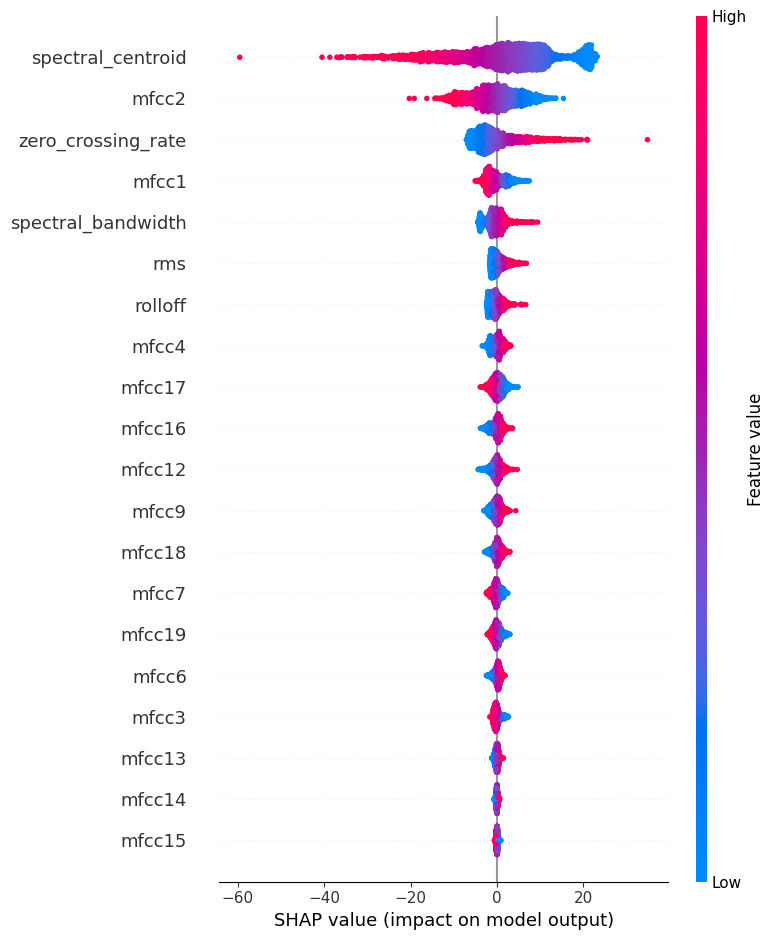


Generating Individual Prediction Explanation Plot (Waterfall)...


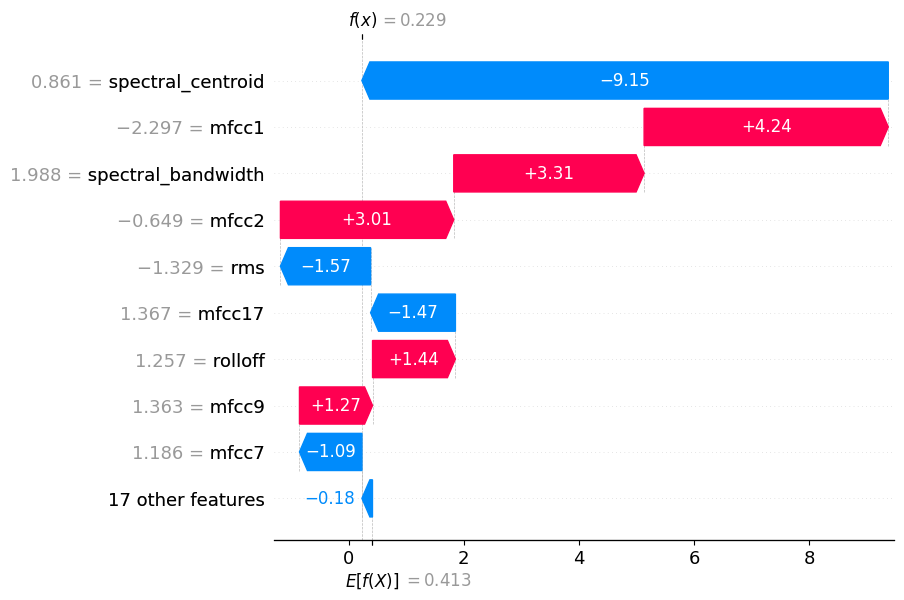

In [10]:
# First, ensure shap is installed
!pip install shap

import shap

# --- Step 1: Train a model on the most interpretable data ---
# For XAI, we want to explain predictions based on original features, not abstract components.
# So, we'll use the Logistic Regression model trained on the "Original Scaled" data.
print("\n--- Setting up model for SHAP explanation ---")
model_for_explanation = LogisticRegression(random_state=42, max_iter=1000)
model_for_explanation.fit(X_train_scaled, y_train)

# --- Step 2: Create a SHAP Explainer ---
# We use a LinearExplainer, which is optimized for linear models like Logistic Regression.
explainer = shap.LinearExplainer(model_for_explanation, X_train_scaled)

# --- Step 3: Calculate SHAP values for the test set ---
# This computes the contribution of each feature to each prediction in the test set.
shap_values = explainer.shap_values(X_test_scaled)
print("SHAP values calculated successfully.")


# --- Step 4: Generate XAI Plots ---

# Plot 1: Global Feature Importance (Summary Plot)
# This plot shows the most important features overall. Each point is a single prediction from the test set.
# - Color: Red indicates a high feature value, Blue indicates a low feature value.
# - X-axis: The SHAP value. Positive values push the prediction towards 'FAKE' (1), negative values push it towards 'REAL' (0).
print("\nGenerating Global Feature Importance Plot...")
shap.summary_plot(shap_values, X_test_scaled, feature_names=feature_names)

# Plot 2: Individual Prediction Explanation (Waterfall Plot)
# This plot breaks down a single prediction, showing how each feature contributed to the final score.
# We'll explain the first prediction in the test set.
print("\nGenerating Individual Prediction Explanation Plot (Waterfall)...")
shap.waterfall_plot(shap.Explanation(values=shap_values[0], 
                                     base_values=explainer.expected_value, 
                                     data=X_test_scaled[0], 
                                     feature_names=feature_names))


--- Analysis of SHAP Plots ---

Interpretation of the SHAP Summary Plot:
- The features are ranked by their overall importance from top to bottom.
- For each feature, the plot shows how high (red) or low (blue) values of that feature impact the prediction.
- For example, if a feature at the top has red dots to the right of the zero line, it means high values of that feature strongly push the model to predict 'FAKE' (1). If it has blue dots to the left, low values push the model to predict 'REAL' (0).

Interpretation of the Waterfall Plot:
- This explains a single prediction.
- E(f(x)) is the 'base value' - the average prediction over the entire dataset.
- Each red arrow shows a feature value that pushed the prediction higher (towards 'FAKE').
- Each blue arrow shows a feature value that pushed the prediction lower (towards 'REAL').
- The final f(x) is the model's output score for this specific instance before the final logistic transformation.


--- Confusion Matrix Visualization ---


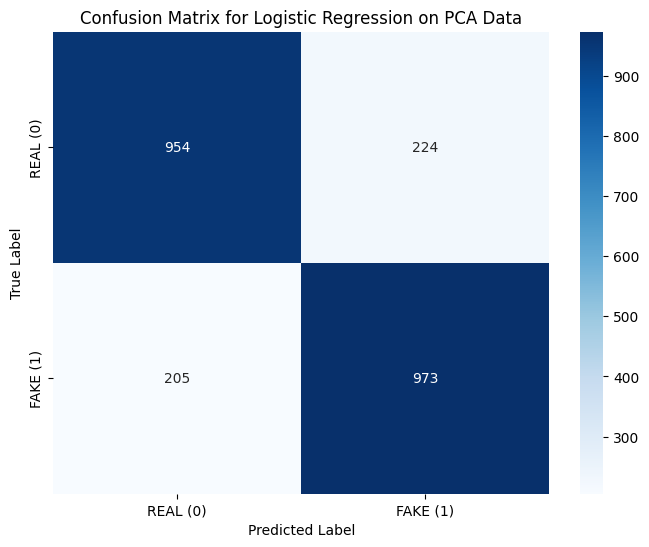

In [11]:
# --- XAI Plot Interpretation ---
print("\n--- Analysis of SHAP Plots ---")
print("""
Interpretation of the SHAP Summary Plot:
- The features are ranked by their overall importance from top to bottom.
- For each feature, the plot shows how high (red) or low (blue) values of that feature impact the prediction.
- For example, if a feature at the top has red dots to the right of the zero line, it means high values of that feature strongly push the model to predict 'FAKE' (1). If it has blue dots to the left, low values push the model to predict 'REAL' (0).

Interpretation of the Waterfall Plot:
- This explains a single prediction.
- E(f(x)) is the 'base value' - the average prediction over the entire dataset.
- Each red arrow shows a feature value that pushed the prediction higher (towards 'FAKE').
- Each blue arrow shows a feature value that pushed the prediction lower (towards 'REAL').
- The final f(x) is the model's output score for this specific instance before the final logistic transformation.
""")

# --- Confusion Matrix for the Best Performing Model ---
print("\n--- Confusion Matrix Visualization ---")
# From our results, Logistic Regression on PCA data was a top performer.
best_model = LogisticRegression(random_state=42, max_iter=1000)
best_model.fit(X_train_pca, y_train)
y_pred_best = best_model.predict(X_test_pca)

cm = confusion_matrix(y_test, y_pred_best)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['REAL (0)', 'FAKE (1)'], 
            yticklabels=['REAL (0)', 'FAKE (1)'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Logistic Regression on PCA Data')
plt.show()